In [26]:
import cv2
import os

os.makedirs("dataset/train/rojo", exist_ok=True)
os.makedirs("dataset/train/azul", exist_ok=True)
os.makedirs("dataset/test/rojo", exist_ok=True)
os.makedirs("dataset/test/azul", exist_ok=True)

cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cam.release()

if ret:
    cv2.imwrite("foto.jpg", frame)
    print("✅ Imagen base capturada")
else:
    raise Exception("❌ No se pudo capturar imagen")


✅ Imagen base capturada


In [27]:
import numpy as np

img = cv2.imread("foto.jpg")  # BGR

for i in range(20):
    # ROJO
    red = img.copy()
    red[:, :, 0] = 0
    red[:, :, 1] = 0
    red[:, :, 2] = np.clip(red[:, :, 2] + np.random.randint(50, 130), 0, 255)
    cv2.imwrite(f"dataset/train/rojo/rojo_{i}.jpg", red)

    # AZUL
    blue = img.copy()
    blue[:, :, 1] = 0
    blue[:, :, 2] = 0
    blue[:, :, 0] = np.clip(blue[:, :, 0] + np.random.randint(50, 130), 0, 255)
    cv2.imwrite(f"dataset/train/azul/azul_{i}.jpg", blue)

for i in range(5):
    # TEST ROJO
    red = img.copy()
    red[:, :, 0] = 0
    red[:, :, 1] = 0
    red[:, :, 2] = np.clip(red[:, :, 2] + np.random.randint(130, 256), 0, 255)
    cv2.imwrite(f"dataset/test/rojo/rojo_{i}.jpg", red)

    # TEST AZUL
    blue = img.copy()
    blue[:, :, 1] = 0
    blue[:, :, 2] = 0
    blue[:, :, 0] = np.clip(blue[:, :, 0] + np.random.randint(130, 256), 0, 255)
    cv2.imwrite(f"dataset/test/azul/azul_{i}.jpg", blue)

print("📁 Dataset expandido correctamente")


📁 Dataset expandido correctamente


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    "dataset/train",
    image_size=(64, 64),
    batch_size=8,
    label_mode="int",
    shuffle=True
)

test_ds = image_dataset_from_directory(
    "dataset/test",
    image_size=(64, 64),
    batch_size=1,
    label_mode="int",
    shuffle=False
)


Found 40 files belonging to 2 classes.


Found 10 files belonging to 2 classes.


C:\Users\miste\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


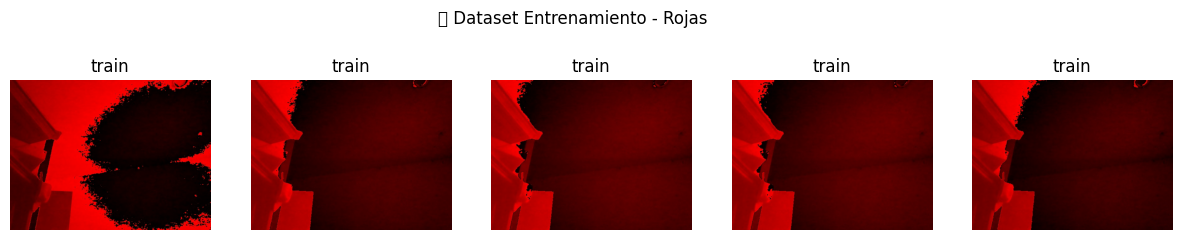

C:\Users\miste\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


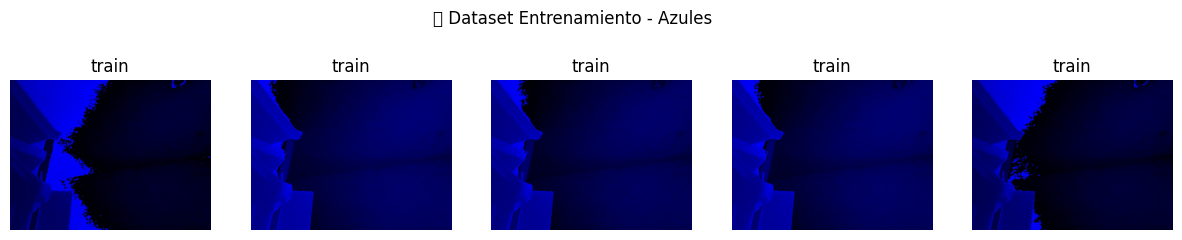

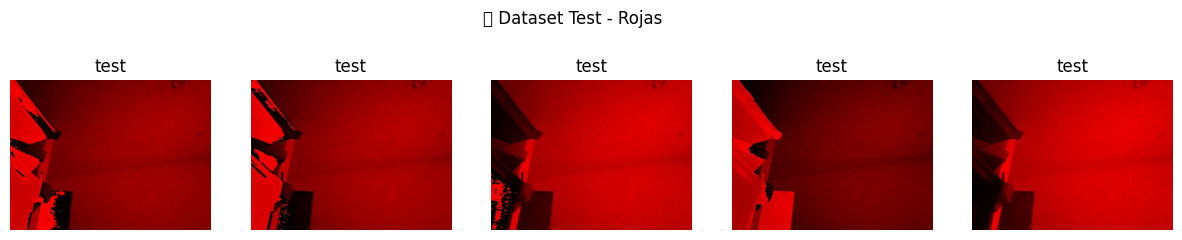

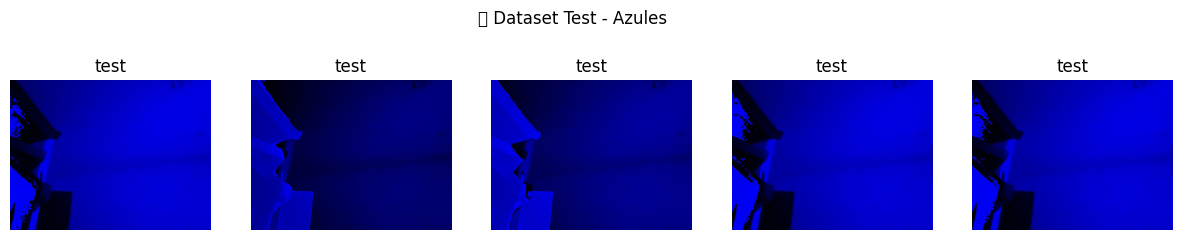

In [49]:
import matplotlib.pyplot as plt
import glob

def mostrar_imagenes(titulo, rutas):
    fig, axs = plt.subplots(1, len(rutas), figsize=(15, 3))
    for i, ruta in enumerate(rutas):
        img = cv2.imread(ruta)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i].imshow(img_rgb)
        axs[i].axis('off')
        axs[i].set_title(ruta.split("/")[-2])
    plt.suptitle(titulo)
    plt.show()

# Muestra 5 rojas y 5 azules del set de entrenamiento
train_rojas = sorted(glob.glob("dataset/train/rojo/*.jpg"))[:5]
train_azules = sorted(glob.glob("dataset/train/azul/*.jpg"))[:5]
mostrar_imagenes("🟥 Dataset Entrenamiento - Rojas", train_rojas)
mostrar_imagenes("🟦 Dataset Entrenamiento - Azules", train_azules)

# Muestra 5 rojas y 5 azules del set de prueba
test_rojas = sorted(glob.glob("dataset/test/rojo/*.jpg"))[:5]
test_azules = sorted(glob.glob("dataset/test/azul/*.jpg"))[:5]
mostrar_imagenes("🟥 Dataset Test - Rojas", test_rojas)
mostrar_imagenes("🟦 Dataset Test - Azules", test_azules)


In [43]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(64, 64, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\miste\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(train_ds, epochs=2, verbose=1)


Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8448 - loss: 0.5386
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0549 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


C:\Users\miste\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


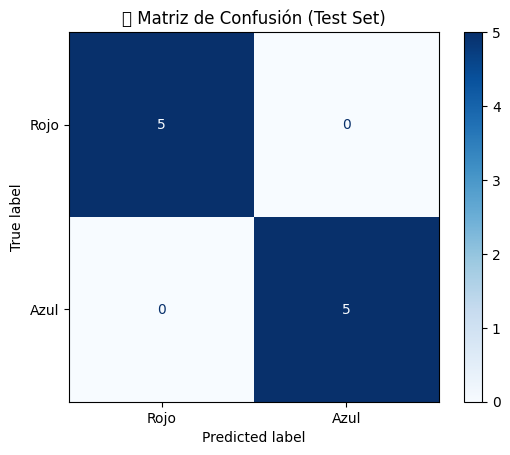

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener predicciones
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.append(int(labels.numpy()[0]))
    y_pred.append(int(preds[0][0] > 0.5))  # umbral 0.5

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rojo", "Azul"])
disp.plot(cmap=plt.cm.Blues)
plt.title("📊 Matriz de Confusión (Test Set)")
plt.show()


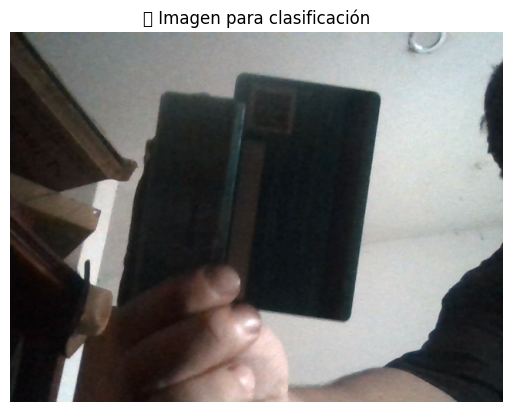

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
🔵 Predicción: AZUL (confianza: 0.50)


In [48]:
import matplotlib.pyplot as plt

# Captura nueva imagen para clasificación
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cam.release()

if not ret:
    raise Exception("❌ No se pudo capturar imagen")

# Mostrar imagen
plt.imshow(frame[:, :, ::-1])
plt.title("📷 Imagen para clasificación")
plt.axis('off')
plt.show()

# Preprocesar y predecir
img = cv2.resize(frame, (64, 64))
img = np.expand_dims(img / 255.0, axis=0)

pred = model.predict(img)

# Mostrar predicción
if pred[0][0] > 0.5:
    print(f"🔵 Predicción: AZUL (confianza: {pred[0][0]:.2f})")
else:
    print(f"🔴 Predicción: ROJO (confianza: {1 - pred[0][0]:.2f})")
